# Interval Replacements of Persistence Modules

In this tutorial notebook, we focus on a specific example of representation (also called persistence module) to illustrate how to compute its interval replacement using the provided code in the **utils.py** file. Some visualization features from **display.py** are available in 1D or 2D settings. Note that all the computations should be valid for any d-dimensional grid with $d \ge 1$.

In this tutorial you will see how to:
- **define a representation** object ;
- **define intervals** of this representation ;
- **compute interval ranks and interval signed multiplicities**, which yield the interval replacement of the representation.

## Setup: import

All the necessary code to compute interval replacements can be found in the **utils.py** file. The **display.py** file contains some functions to help visualizing representations of 1D or 2D grids.

In [1]:
import numpy as np
from IPython.display import Image, display
from utils import Representation, Interval
from display import display_rep, display_interval

## Create a grid and define a representation

We will work with the following 3x3 2D grid. Feel free to consider your own quiver/representation. Note that the implementation should also work for any d-dimensional grid with $d \ge 1$. 

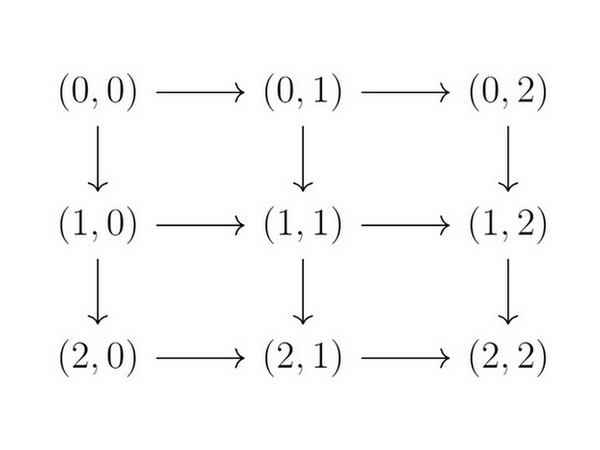

In [2]:
display(Image("img/quiver.png", width=400))

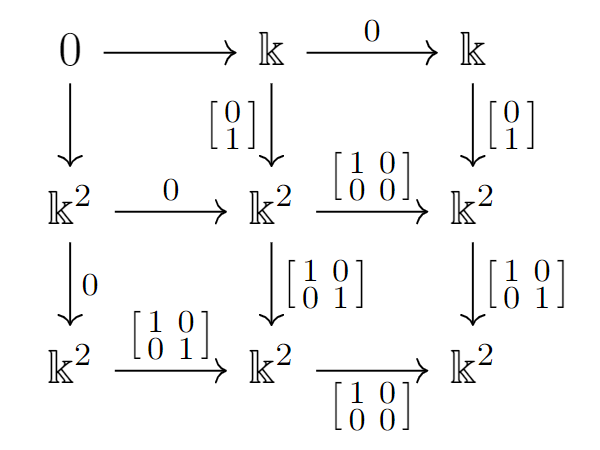

In [3]:
display(Image("img/representation.png", width=400))

Note: in what follows we will consider $\mathbb{k} = \mathbb{R}$. If necessary, you can modify the code to compute path evaluations, interval ranks, and interval replacements in finite fields for example.

First, we can create an instance of the *Representation* class as follows, by specifying the dimensions of the underlying quiver.

In [4]:
dimensions = [3, 3]  # 2D grid 3x3
L = Representation(dimensions)

We can now visualize the representation thanks to **display_rep**. 

In [5]:
display_rep(L)

.          .          .
                                 
                                 
                                 
.          .          .
                                 
                                 
                                 
.          .          .


At the moment, the representation is a 3x3 grid with no vector space. We can add vector spaces manually.

In [6]:
# manually add vector spaces
L.create_vecs((0, 0), 0) # (position, vector space's dimension)
L.create_vecs((0, 1), 1)
L.create_vecs((0, 2), 1)
L.create_vecs((1, 0), 2)
L.create_vecs((1, 1), 2)
L.create_vecs((1, 2), 2)
L.create_vecs((2, 0), 2)
L.create_vecs((2, 1), 2)
L.create_vecs((2, 2), 2)

In [7]:
display_rep(L)

0          1          1
                                 
                                 
                                 
2          2          2
                                 
                                 
                                 
2          2          2


Now that we successfully added all the vector spaces, we can specify linear maps.

In [8]:
# manually add linear maps u: x -> y
L.create_matrix((0, 0), (1, 0), None)  # (x, y, matrix)
L.create_matrix((0, 0), (0, 1), None) # for matrices equal to 0 you can directly write None
L.create_matrix((0, 1), (0, 2), np.array([[0]])) # you can also explicitely write a matrix with zeros everywhere
L.create_matrix((0, 1), (1, 1), np.array([[0], [1]]))
L.create_matrix((0, 2), (1, 2), np.array([[0], [1]]))

L.create_matrix((1, 0), (2, 0), np.array([[0, 0], [0, 0]])) 
L.create_matrix((1, 0), (1, 1), np.array([[0, 0], [0, 0]])) 
L.create_matrix((1, 1), (1, 2), np.array([[1, 0], [0, 0]]))
L.create_matrix((1, 1), (2, 1), np.array([[1, 0], [0, 1]]))
L.create_matrix((1, 2), (2, 2), np.array([[1, 0], [0, 1]]))

L.create_matrix((2, 0), (2, 1), np.array([[1, 0], [0, 1]]))
L.create_matrix((2, 1), (2, 2), np.array([[1, 0], [0, 0]]))

In [9]:
display_rep(L)

0 -------> 1 -------> 1
|          |          |          
|          |          |          
v          v          v          
2 -------> 2 -------> 2
|          |          |          
|          |          |          
v          v          v          
2 -------> 2 -------> 2


Once we have specified all the matrices, we can now evaluate $L(\rho)$, given a path $\rho: x \rightarrow y$.

In [10]:
L.evaluation((0,1), (2,1)) # (x, y)

array([[0.],
       [1.]])

This evaluation attribute will be useful to compute interval ranks and interval signed multiplicities. But first, we need to define intervals.

## Define intervals

We can define intervals by providing a list of sources and a list of sinks.

In [11]:
itv1 = Interval([(2,0),(1,1),(0,2)], [(2,2)]) # (sources, sinks)
# interval with 3 sources: (2,0), (1,1), (0,2) and 1 sink: (2,2)

Let us display the interval.

In [12]:
display_interval(L, itv1)

.          .          X
                      |          
                      |          
                      v          
.          X -------> X
           |          |          
           |          |          
           v          v          
X -------> X -------> X


Note that the intervals are defined through their sources and their sinks. If needed, you can access all the points in the interval with the **int_hull** attribute.

In [13]:
L.int_hull(itv1)

[(1, 2), (2, 1), (1, 1), (2, 0), (0, 2), (2, 2)]

Conversely, given a list of points forming a convex and connected set, we can create an Interval object with **get_src_snk**:

In [14]:
points = [(1, 2), (2, 1), (1, 1), (2, 0), (0, 2), (2, 2)]
src, snk =  L.get_src_snk(points)
itv2 = Interval(src,snk)
display_interval(L, itv2)

.          .          X
                      |          
                      |          
                      v          
.          X -------> X
           |          |          
           |          |          
           v          v          
X -------> X -------> X


You can access the list of all intervals with **list_int**. Note that in the future it might be good to precompute these intervals for commonly used grids such as commutative ladders.

In [15]:
intervals = L.list_int(conv=False)

In [16]:
print(len(intervals))

83


## Interval ranks

At this step, we have all the tools needed to compute interval ranks. Interval ranks correspond to compression multiplicities, as defined in **[2]**. We will use the notations of **[1]**. 

Let us consider a representation $L$, and a compression system $\xi$ with the essential covering property. This ensures that $L$ has the same interval ranks and interval replacement as with the *tot* assignment, which corresponds to the generalized rank invariant **[3]**.

One way to compute interval ranks is to use the formula in **[1, Theorem 5.20]**:

\begin{equation*}
    \text{rank}_I^{\xi} L =
\text{rank} \left[\begin{array}{ccc}
\mathbf{M} & \mathbf{0}\\
\left[\begin{array}{ccc}
L_{b_1, a_1} & \mathbf{0}\\
\mathbf{0} & \mathbf{0}
\end{array}\right] & \mathbf{N}
\end{array}\right] - \text{rank} \mathbf{M} - \text{rank} \mathbf{N}
\end{equation*}

where $I$ is any interval, and if $I$ has only one sink (resp. only one source), then
$\mathbf{N}$ (resp. $\mathbf{M}$) is an empty matrix. Otherwise $\mathbf{M}$ has the form in **[1, Theorem 5.7]** and $\mathbf{N}$ has the form in **[1, Theorem 5.16]**.

Given an interval $I$, we can compute the associated matrices $\bf{M}$ and $\bf{N}$, which are used to compute the $I$-rank of $L$. 

In [17]:
print(L.matrix_M(itv1))

[[ 1.  0. -1. -0.  0.]
 [ 0.  1. -0. -1.  0.]
 [ 1.  0.  0.  0. -0.]
 [ 0.  0.  0.  0. -1.]
 [ 0.  0.  1.  0. -0.]
 [ 0.  0.  0.  0. -1.]]


In [18]:
# since itv1 has only one sink, N should be empty
print(L.matrix_N(itv1))

[]


We can directly compute the $I$-rank of $L$ as follows.

In [19]:
L.int_rank(itv1)

0

## Interval replacement

Now that we can compute interval ranks, we can compute the interval replacement of the representation. Again, we refer to **[1]** for the notations. 

Given a representation $L$ and a compression system $\xi$, its interval replacement $\delta^\xi(L)$ is defined as follows:
\begin{aligned}
\delta^\xi(L)_+ &:=
\bigoplus\limits_{\substack{I\in\mathbb{I}\\\delta^\xi_L(I)>0}} {V_I}^{\delta^\xi_L(I)},
\quad
\delta^\xi(L)_- :=
\bigoplus\limits_{\substack{I\in\mathbb{I}\\\delta^\xi_L(I)<0}} {V_I}^{(-\delta^\xi_L(I))},
 \text{ and}\\
\delta^\xi(L)&:= [\![\delta^\xi(L)_+ ]\!] - [\![\delta^\xi(L)_-]\!],
\end{aligned}
where $[\![X]\!]$ is the element of the split Grothendieck group $K^\oplus(A)$ of $A$ corresponding to a module $X$.

So, given a compression system $\xi$, the interval replacement of the representation $L$ is characterized by the interval signed multiplicities $(\delta^\xi_L(I))_{I \in \mathbb{I}}$. Signed interval multiplicities are given by the Möbius inversion of the interval ranks:
$$
\delta^\xi_L(I) := \sum_{S \subseteq \text{Cov}(I)} 
(-1)^{|S|} \ \text{rank}_{\bigvee S}^{\xi} L
$$

Note that it is also possible to define $\delta^\xi_L$ by induction in the following way: first, define $\delta^\xi_L(I) := \text{rank}_I^{\xi} L$ for every maximal interval $I$. Then define inductively $\delta^\xi_L(I) := \text{rank}_I^{\xi} L - \sum_{I < J}\delta^\xi_L(J)$.

For the implementation, we will use directly the definition with the Möbius inversion instead of the definition by induction.

In [20]:
L.int_replacement(itv1)
# The interval itv1 has a signed multiplicity equal to zero

0

Let us compute all the interval signed multiplicities and display the nonzero ones.

In [21]:
for itv in intervals:
    repl = L.int_replacement(itv)
    if repl != 0 :
        print(f"Interval with source(s) {itv.src} and sink(s) {itv.snk}")
        display_interval(L, itv)
        print(f"Interval signed multiplicity: {L.int_replacement(itv)}")
        print()

Interval with source(s) [(1, 0)] and sink(s) [(1, 0)]
.          .          .
                                 
                                 
                                 
X          .          .
                                 
                                 
                                 
.          .          .
Interval signed multiplicity: 2

Interval with source(s) [(0, 2)] and sink(s) [(2, 2)]
.          .          X
                      |          
                      |          
                      v          
.          .          X
                      |          
                      |          
                      v          
.          .          X
Interval signed multiplicity: 1

Interval with source(s) [(0, 1), (2, 0)] and sink(s) [(2, 1)]
.          X          .
           |                     
           |                     
           v                     
.          X          .
           |                     
           |                

## References

**[1]**: Asashiba, H., Gauthier, E., & Liu, E. *Interval Replacements of Persistence Modules*. arXiv preprint [arXiv:2403.08308](https://arxiv.org/abs/2403.08308) (2024).

**[2]**: Asashiba, H., Escolar, E. G., Nakashima, K., & Yoshiwaki, M. *On Approximation of 2D Persistence Modules by Interval-decomposables*. Journal of Computational Algebra, Volumes 6–7, 2023, 100007, ISSN 2772-8277, [https://doi.org/10.1016/j.jaca.2023.100007](https://doi.org/10.1016/j.jaca.2023.100007).

**[3]**: Kim, W., & Mémoli, F. Generalized persistence diagrams for persistence modules over posets. J Appl. and Comput. Topology 5, 533–581 (2021). [https://doi.org/10.1007/s41468-021-00075-1](https://doi.org/10.1007/s41468-021-00075-1).